**Imports**

In [1]:
import pandas as pd
import math
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Daily data #

## Assembling dataframes for each feature

In [5]:
# Gold price (target)

df_gold = pd.DataFrame(yf.download('GC=F', period = '1'))
df_gold.shape

[*********************100%***********************]  1 of 1 completed


(1, 6)

In [6]:
df_gold

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-10,1852.300049,1868.5,1852.0,1862.0,1862.0,332


In [3]:
# Rename columns to be specific 
df_gold.columns= ['Open gold', 'High gold', 'Low gold', 'Close gold', 'Adj Close gold', 'Volume gold']

In [9]:
#Gold producer ETFs
df_ring = pd.DataFrame(yf.download('RING', period = '1'))
df_ring.shape

[*********************100%***********************]  1 of 1 completed


(1, 6)

In [8]:
# Rename columns to be specific 
df_ring.columns= ['Open RING', 'High RING', 'Low RING', 'Close RING', 'Adj Close RING', 'Volume RING']

In [6]:
df_brent = pd.DataFrame(yf.download('CL=F', period = 'max'))
df_brent.shape

[*********************100%***********************]  1 of 1 completed


(5658, 6)

In [7]:
# Rename columns to be specific 
df_brent.columns= ['Open Brent', 'High Brent', 'Low Brent', 'Close Brent', 'Adj Close Brent', 'Volume Brent']

In [8]:
df_silver = pd.DataFrame(yf.download('SI=F', period = 'max'))
df_silver.shape

[*********************100%***********************]  1 of 1 completed


(5648, 6)

In [9]:
# Rename columns to be specific 
df_silver.columns= ['Open Silver', 'High Silver', 'Low Silver', 'Close Silver', 'Adj Close Silver', 'Volume Silver']

In [10]:
df_palladium = pd.DataFrame(yf.download('PA=F', period = 'max'))
df_palladium.shape

[*********************100%***********************]  1 of 1 completed


(5355, 6)

In [11]:
# Rename columns to be specific 
df_palladium.columns= ['Open Palladium', 'High Palladium', 'Low Palladium', 'Close Palladium', 'Adj Close Palladium', 'Volume Palladium']

In [12]:
# Golden ocean share price as a proxy for dry bulk freight costs
df_freight = pd.DataFrame(yf.download('GOGL', period = 'max'))
df_freight.shape

[*********************100%***********************]  1 of 1 completed


(6560, 6)

In [13]:
# Rename columns to be specific 
df_freight.columns= ['Open Freight', 'High Freight', 'Low Freight', 'Close Freight', 'Adj Close Freight', 'Volume Freight']

In [14]:
# Canadian stock market index
df_ca_stocks = pd.DataFrame(yf.download('^GSPTSE', period = 'max'))
df_ca_stocks.shape

[*********************100%***********************]  1 of 1 completed


(10967, 6)

In [15]:
# Rename columns to be specific 
df_ca_stocks.columns= ['Open CA', 'High CA', 'Low CA', 'Close CA', 'Adj Close CA', 'Volume CA']

In [16]:
# 10y treasury yield
df_tnx = pd.DataFrame(yf.download('^TNX', period = 'max'))
df_tnx.shape

[*********************100%***********************]  1 of 1 completed


(15304, 6)

In [17]:
# Rename columns to be specific 
df_tnx.columns= ['Open TNX', 'High TNX', 'Low TNX', 'Close TNX', 'Adj Close TNX', 'Volume TNX']

In [18]:
plat_data = yf.download('PL=F',period = 'max')
plat_data.columns= ["Open PLAT", "High PLAT", "Low PLAT", "Close PLAT", "Adj Close PLAT", "Volume PLAT"]

[*********************100%***********************]  1 of 1 completed


In [19]:
copper_data = yf.download('HG=F', period = 'max')
copper_data.columns= ["Open Copper", "High Copper", "Low Copper", "Close Copper", "Adj Close Copper", "Volume Copper"]

[*********************100%***********************]  1 of 1 completed


In [20]:
aluminum_data = yf.download('ALI=F', period = 'max')
aluminum_data.columns= ["Open ALI", "High ALI", "Low ALI", "Close ALI", "Adj Close ALI", "Volume ALI"]

[*********************100%***********************]  1 of 1 completed


In [21]:
spx_data = yf.download('^GSPC', period = 'max')
spx_data.columns= ["Open SPX", "High SPX", "Low SPX", "Close SPX", "Adj Close SPX", "Volume SPX"]
spx_data.tail(100)

[*********************100%***********************]  1 of 1 completed


,Open SPX,High SPX,Low SPX,Close SPX,Adj Close SPX,Volume SPX
Date,,,,,,
2022-10-10,3647.510010,3652.169922,3588.100098,3612.389893,3612.389893,3834320000
2022-10-11,3595.860107,3640.659912,3568.449951,3588.840088,3588.840088,4759030000
2022-10-12,3590.830078,3608.340088,3573.860107,3577.030029,3577.030029,4006830000
2022-10-13,3520.370117,3685.409912,3491.580078,3669.909912,3669.909912,5021680000
2022-10-14,3690.409912,3712.000000,3579.679932,3583.070068,3583.070068,4243030000
...,...,...,...,...,...,...
2023-02-27,3992.360107,4018.050049,3973.550049,3982.239990,3982.239990,3836950000
2023-02-28,3977.189941,3997.500000,3968.979980,3970.149902,3970.149902,5043400000
2023-03-01,3963.340088,3971.729980,3939.050049,3951.389893,3951.389893,4249480000


In [22]:
nasdaq_data = yf.download('^IXIC', period = 'max')
nasdaq_data.columns= ["Open NDQ", "High NDQ", "Low NDQ", "Close NDQ", "Adj Close NDQ", "Volume NDQ"]

[*********************100%***********************]  1 of 1 completed


In [23]:
btc_data = yf.download('BTC-USD', period = 'max')
btc_data.columns= ["Open BTC", "High BTC", "Low BTC", "Close BTC", "Adj Close BTC", "Volume BTC"]

[*********************100%***********************]  1 of 1 completed


In [24]:
df_vix = yf.download('^VIX', period = 'max')
df_vix.columns= ["Open VIX", "High VIX", "Low VIX", "Close VIX", "Adj Close VIX", "Volume VIX"]

[*********************100%***********************]  1 of 1 completed


In [25]:
df_eurusd = yf.download('EURUSD=X', period = 'max')
df_eurusd.columns= ["Open EUR/USD", "High EUR/USD", "Low EUR/USD", "Close EUR/USD", "Adj Close EUR/USD", "Volume EUR/USD"]

[*********************100%***********************]  1 of 1 completed


In [26]:
df_usdjpy = yf.download('JPY=X', period = 'max')
df_usdjpy.columns= ["Open USD/JPY", "High USD/JPY", "Low USD/JPY", "Close USD/JPY", "Adj Close USD/JPY", "Volume USD/JPY"]

[*********************100%***********************]  1 of 1 completed


In [27]:
df_usdchf = yf.download('CHF=X', period = 'max')
df_usdchf.columns= ["Open USD/CHF", "High USD/CHF", "Low USD/CHF", "Close USD/CHF", "Adj Close USD/CHF", "Volume USD/CHF"]

[*********************100%***********************]  1 of 1 completed


## Concatenating dataframes together

In [28]:
# convert date column to datetime
df_gold.index = pd.to_datetime(df_gold.index, format = '%Y-%m-%d')
df_ring.index = pd.to_datetime(df_ring.index, format = '%Y-%m-%d')
df_silver.index = pd.to_datetime(df_silver.index, format = '%Y-%m-%d')
df_palladium.index = pd.to_datetime(df_palladium.index, format = '%Y-%m-%d')
df_freight.index = pd.to_datetime(df_freight.index, format = '%Y-%m-%d')
df_ca_stocks.index = pd.to_datetime(df_ca_stocks.index, format = '%Y-%m-%d')
df_tnx.index = pd.to_datetime(df_tnx.index, format = '%Y-%m-%d')
df_vix.index = pd.to_datetime(df_vix.index, format = '%Y-%m-%d')
df_eurusd.index = pd.to_datetime(df_eurusd.index, format = '%Y-%m-%d')
df_usdjpy.index = pd.to_datetime(df_usdjpy.index, format = '%Y-%m-%d')
df_usdchf .index = pd.to_datetime(df_usdchf .index, format = '%Y-%m-%d')



plat_data.index = pd.to_datetime(plat_data.index, format = '%Y-%m-%d')
copper_data.index = pd.to_datetime(copper_data.index, format = '%Y-%m-%d')
aluminum_data.index = pd.to_datetime(aluminum_data.index, format = '%Y-%m-%d')
spx_data.index = pd.to_datetime(spx_data.index, format = '%Y-%m-%d')
nasdaq_data.index = pd.to_datetime(nasdaq_data.index, format = '%Y-%m-%d')
btc_data.index = pd.to_datetime(btc_data.index, format = '%Y-%m-%d')




In [29]:
# List of dataframes
dataframes = [df_gold,
df_ring,
df_brent,
df_silver,
df_palladium,
df_freight,
df_ca_stocks,
df_tnx,
df_vix,
plat_data,
copper_data,
aluminum_data,
spx_data,
nasdaq_data,
btc_data,
df_eurusd,
df_usdjpy,
df_usdchf]

In [30]:
# Concatenate dfs using a for loop

for i in range(len(dataframes)):
    if i == 0:
        merged_df = dataframes[i]
    else:
        merged_df = pd.merge(merged_df, dataframes[i], left_index=True, right_index=True, how= 'outer')
        
# merged_df = pd.merge(df_ring, df_silver, left_index=True, right_index=True, how= 'outer')
# merged_df = pd.merge(merged_df, df_brent, left_index=True, right_index=True, how= 'outer')
# merged_df = pd.merge(merged_df, df_palladium, left_index=True, right_index=True, how= 'outer')
# merged_df = pd.merge(merged_df, df_freight, left_index=True, right_index=True, how= 'outer')
# merged_df = pd.merge(merged_df, df_ca_stocks, left_index=True, right_index=True, how= 'outer')
# merged_df = pd.merge(merged_df, df_tnx, left_index=True, right_index=True, how= 'outer')


merged_df = pd.DataFrame(merged_df)
merged_df.shape

(25112, 108)

In [31]:
# take bottom 6000 rows
merged_df_2 = merged_df.tail(6000)

In [32]:
# to keep volume in
# df_filtered = merged_df_2.filter(items=merged_df_2.filter(like='Close').columns.union(merged_df_2.filter(like='Volume').columns))

#removing all except 'Adj Close'
df_filtered = merged_df_2.filter(like='Adj Close')

#Drop columns with 'Adj' in title
# df_filtered = df_filtered.drop(df_filtered.filter(like='Adj'), axis=1)

#show percentage of missing values for each feature
df_filtered.isna().sum()/6000*100



Adj Close gold         17.883333
Adj Close RING         53.516667
Adj Close Brent        17.800000
Adj Close Silver       17.900000
Adj Close Palladium    25.516667
Adj Close Freight      17.716667
Adj Close CA           17.933333
Adj Close TNX          17.833333
Adj Close VIX          17.716667
Adj Close PLAT         28.866667
Adj Close Copper       17.816667
Adj Close ALI          63.583333
Adj Close SPX          17.716667
Adj Close NDQ          17.716667
Adj Close BTC          48.483333
Adj Close EUR/USD      16.733333
Adj Close USD/JPY      15.200000
Adj Close USD/CHF      15.616667
dtype: float64

In [33]:
df_filtered.head()

,Adj Close gold,Adj Close RING,Adj Close Brent,Adj Close Silver,Adj Close Palladium,Adj Close Freight,Adj Close CA,Adj Close TNX,Adj Close VIX,Adj Close PLAT,Adj Close Copper,Adj Close ALI,Adj Close SPX,Adj Close NDQ,Adj Close BTC,Adj Close EUR/USD,Adj Close USD/JPY,Adj Close USD/CHF
Date,,,,,,,,,,,,,,,,,,
2003-07-24,362.200012,NaN,30.219999,5.105,169.000000,8.677856,7251.399902,4.167,18.600000,704.599976,0.7900,NaN,981.599976,1701.420044,NaN,NaN,118.949997,NaN
2003-07-25,362.700012,NaN,30.170000,5.070,167.500000,8.520919,7262.600098,4.178,17.750000,697.200012,0.7945,NaN,998.679993,1730.699951,NaN,NaN,118.760002,NaN
2003-07-28,364.799988,NaN,30.110001,5.190,173.500000,8.142413,7284.500000,4.284,18.360001,703.400024,0.8045,NaN,996.520020,1735.359985,NaN,NaN,119.410004,NaN
2003-07-29,361.700012,NaN,30.240000,5.162,178.350006,8.225502,7227.399902,4.398,18.670000,698.000000,0.8030,NaN,989.280029,1731.369995,NaN,NaN,119.820000,NaN
2003-07-30,356.200012,NaN,30.680000,5.056,177.000000,7.957782,7205.000000,4.315,18.850000,685.000000,0.7995,NaN,987.489990,1720.910034,NaN,NaN,120.279999,NaN


In [110]:
# THIS IS THE POINT WHERE WE DECIDED TO START FROM 2010 DUE TO PALADIUM AND PLATINUM HAVING 
# LOADS OF MISSING VALS IN 2008 AND 2009:

# PALLADIUM MISSING VAL COUNT
# Date
# 2004-12-31     11
# 2005-12-31     24
# 2006-12-31     85
# 2007-12-31    157
# 2008-12-31    126
# 2009-12-31     81

# PLAT MISSING VAL COUNT
# Date
# 2004-12-31     63
# 2005-12-31     47
# 2006-12-31    124
# 2007-12-31    133
# 2008-12-31    147
# 2009-12-31    154
# 2010-12-31      9


df = df_filtered.tail(4318)

In [111]:
df.shape

(4318, 18)

In [112]:
# create new column with day of week
df['day_of_week'] = df.index.dayofweek

# filter out rows corresponding to Saturday and Sunday
df = df[(df['day_of_week'] != 5) & (df['day_of_week'] != 6)]

# drop day_of_week column
df = df.drop(columns=['day_of_week'])

/var/folders/0l/q1rddzmd011g72phpx9t_jd40000gn/T/ipykernel_68321/4000164524.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_week'] = df.index.dayofweek


In [113]:
df.head()

,Adj Close gold,Adj Close RING,Adj Close Brent,Adj Close Silver,Adj Close Palladium,Adj Close Freight,Adj Close CA,Adj Close TNX,Adj Close VIX,Adj Close PLAT,Adj Close Copper,Adj Close ALI,Adj Close SPX,Adj Close NDQ,Adj Close BTC,Adj Close EUR/USD,Adj Close USD/JPY,Adj Close USD/CHF
Date,,,,,,,,,,,,,,,,,,
2010-01-04,1117.699951,NaN,81.510002,17.440001,419.799988,25.678797,11866.900391,3.841,20.040001,1517.300049,3.3880,NaN,1132.989990,2308.419922,NaN,1.442398,92.495003,1.0291
2010-01-05,1118.099976,NaN,81.769997,17.781000,420.350006,25.678797,11888.099609,3.755,19.350000,1530.800049,3.3960,NaN,1136.520020,2308.709961,NaN,1.436596,91.584999,1.0337
2010-01-06,1135.900024,NaN,83.180000,18.163000,425.600006,25.697672,11944.500000,3.808,19.160000,1552.199951,3.4775,NaN,1137.140015,2301.090088,NaN,1.440403,92.356003,1.0276
2010-01-07,1133.099976,NaN,82.660004,18.333000,422.950012,26.471237,11887.500000,3.822,19.059999,1553.000000,3.4115,NaN,1141.689941,2300.050049,NaN,1.431803,93.389999,1.0336
2010-01-08,1138.199951,NaN,82.750000,18.458000,424.149994,28.225925,11953.799805,3.808,18.129999,1564.599976,3.3880,NaN,1144.979980,2317.169922,NaN,1.441109,92.660004,1.0236


In [38]:
# drop any rows where all values are null

df = df.dropna(how='all')

In [39]:
df.shape

(3435, 18)

The above shape indicates that even after dropping weekends, there are no rows where all values are null

In [40]:
# drop all rows where gold = null - DECIDED TO INTERPOLATE INSTEAD
# df = df.dropna(subset=['Adj Close gold'])

As a team, we made the decision to drop BTC and ALI features due to too high a percentage (about 45% for both) being missing when we have 5000 rows

In [114]:
df = df.drop(['Adj Close BTC', 'Adj Close ALI'], axis=1)
df = df.drop(['Adj Close RING'], axis=1)

In [115]:
df 

,Adj Close gold,Adj Close Brent,Adj Close Silver,Adj Close Palladium,Adj Close Freight,Adj Close CA,Adj Close TNX,Adj Close VIX,Adj Close PLAT,Adj Close Copper,Adj Close SPX,Adj Close NDQ,Adj Close EUR/USD,Adj Close USD/JPY,Adj Close USD/CHF
Date,,,,,,,,,,,,,,,
2010-01-04,1117.699951,81.510002,17.440001,419.799988,25.678797,11866.900391,3.841,20.040001,1517.300049,3.3880,1132.989990,2308.419922,1.442398,92.495003,1.029100
2010-01-05,1118.099976,81.769997,17.781000,420.350006,25.678797,11888.099609,3.755,19.350000,1530.800049,3.3960,1136.520020,2308.709961,1.436596,91.584999,1.033700
2010-01-06,1135.900024,83.180000,18.163000,425.600006,25.697672,11944.500000,3.808,19.160000,1552.199951,3.4775,1137.140015,2301.090088,1.440403,92.356003,1.027600
2010-01-07,1133.099976,82.660004,18.333000,422.950012,26.471237,11887.500000,3.822,19.059999,1553.000000,3.4115,1141.689941,2300.050049,1.431803,93.389999,1.033600
2010-01-08,1138.199951,82.750000,18.458000,424.149994,28.225925,11953.799805,3.808,18.129999,1564.599976,3.3880,1144.979980,2317.169922,1.441109,92.660004,1.023600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-27,1817.000000,75.680000,20.670000,1410.500000,10.080000,20260.099609,3.922,20.950001,941.599976,4.0090,3982.239990,11466.980469,1.055476,136.395004,0.940030
2023-02-28,1828.900024,77.050003,20.961000,1404.400024,10.380000,20221.199219,3.916,20.700001,955.200012,4.0975,3970.149902,11455.540039,1.061121,136.317001,0.935600
2023-03-01,1837.699951,77.690002,20.959000,1421.699951,10.390000,20259.800781,3.994,20.580000,961.500000,4.1680,3951.389893,11379.480469,1.057731,136.348007,0.941868


In [116]:
df.isna().sum()/len(df)*100

Adj Close gold         3.551674
Adj Close Brent        3.493450
Adj Close Silver       3.609898
Adj Close Palladium    4.541485
Adj Close Freight      3.522562
Adj Close CA           3.813683
Adj Close TNX          3.609898
Adj Close VIX          3.522562
Adj Close PLAT         4.046579
Adj Close Copper       3.522562
Adj Close SPX          3.522562
Adj Close NDQ          3.522562
Adj Close EUR/USD      0.145560
Adj Close USD/JPY      0.145560
Adj Close USD/CHF      0.232897
dtype: float64

In [44]:
#ANALYSIS OF NUMBER OF MISSING PALLADIUM VALUES PER YEAR

# # select the column to analyze
# column_to_analyze = 'Adj Close Palladium'

# # resample the data by year and count the missing values
# missing_values_per_year = df[column_to_analyze].resample('Y').apply(lambda x: x.isna().sum())

# # print the result
# print(missing_values_per_year)


In [45]:
# # ANALYSIS OF NUMBER OF MISSING PLAT VALUES PER YEAR

# # select the column to analyze
# column_to_analyze = 'Adj Close PLAT'

# # resample the data by year and count the missing values
# missing_values_per_year = df[column_to_analyze].resample('Y').apply(lambda x: x.isna().sum())

# # print the result
# print(missing_values_per_year)

In [46]:
# # ANALYSIS OF NUMBER OF MISSING RING VALUES PER YEAR

# # select the column to analyze
# column_to_analyze = 'Adj Close RING'

# # resample the data by year and count the missing values
# missing_values_per_year = df[column_to_analyze].resample('Y').apply(lambda x: x.isna().sum())

# # print the result
# print(missing_values_per_year)

In [47]:
# # select the columns to plot
# columns_to_plot = ['Adj Close Palladium', 'Adj Close PLAT']

# # plot the selected columns
# df[columns_to_plot].plot(figsize=(10, 6))

# # set the title and axis labels
# plt.title('Adj Close Palladium and PLAT')
# plt.xlabel('Date')
# plt.ylabel('Price ($)')

# # display the plot
# plt.show()

In [117]:
#interpolating linearly
df = df.interpolate(method='time')

In [118]:
df.isna().sum()/len(df)*100

Adj Close gold         0.0
Adj Close Brent        0.0
Adj Close Silver       0.0
Adj Close Palladium    0.0
Adj Close Freight      0.0
Adj Close CA           0.0
Adj Close TNX          0.0
Adj Close VIX          0.0
Adj Close PLAT         0.0
Adj Close Copper       0.0
Adj Close SPX          0.0
Adj Close NDQ          0.0
Adj Close EUR/USD      0.0
Adj Close USD/JPY      0.0
Adj Close USD/CHF      0.0
dtype: float64

In [119]:
df.head()

,Adj Close gold,Adj Close Brent,Adj Close Silver,Adj Close Palladium,Adj Close Freight,Adj Close CA,Adj Close TNX,Adj Close VIX,Adj Close PLAT,Adj Close Copper,Adj Close SPX,Adj Close NDQ,Adj Close EUR/USD,Adj Close USD/JPY,Adj Close USD/CHF
Date,,,,,,,,,,,,,,,
2010-01-04,1117.699951,81.510002,17.440001,419.799988,25.678797,11866.900391,3.841,20.040001,1517.300049,3.3880,1132.989990,2308.419922,1.442398,92.495003,1.0291
2010-01-05,1118.099976,81.769997,17.781000,420.350006,25.678797,11888.099609,3.755,19.350000,1530.800049,3.3960,1136.520020,2308.709961,1.436596,91.584999,1.0337
2010-01-06,1135.900024,83.180000,18.163000,425.600006,25.697672,11944.500000,3.808,19.160000,1552.199951,3.4775,1137.140015,2301.090088,1.440403,92.356003,1.0276
2010-01-07,1133.099976,82.660004,18.333000,422.950012,26.471237,11887.500000,3.822,19.059999,1553.000000,3.4115,1141.689941,2300.050049,1.431803,93.389999,1.0336
2010-01-08,1138.199951,82.750000,18.458000,424.149994,28.225925,11953.799805,3.808,18.129999,1564.599976,3.3880,1144.979980,2317.169922,1.441109,92.660004,1.0236


In [51]:
!ls

Fin_dataframes.ipynb                  SARIMAX_model.ipynb
Giselle Feature Datasets.ipynb        dataframe_setup .ipynb
Gold Price Data Set exploration.ipynb df.csv
Preprocessing.ipynb                   df_2010.csv
SARIMA model.ipynb


In [120]:
df.to_csv('df_2010.csv')

## Exploring the data

In [53]:
import seaborn as sns

<AxesSubplot: >

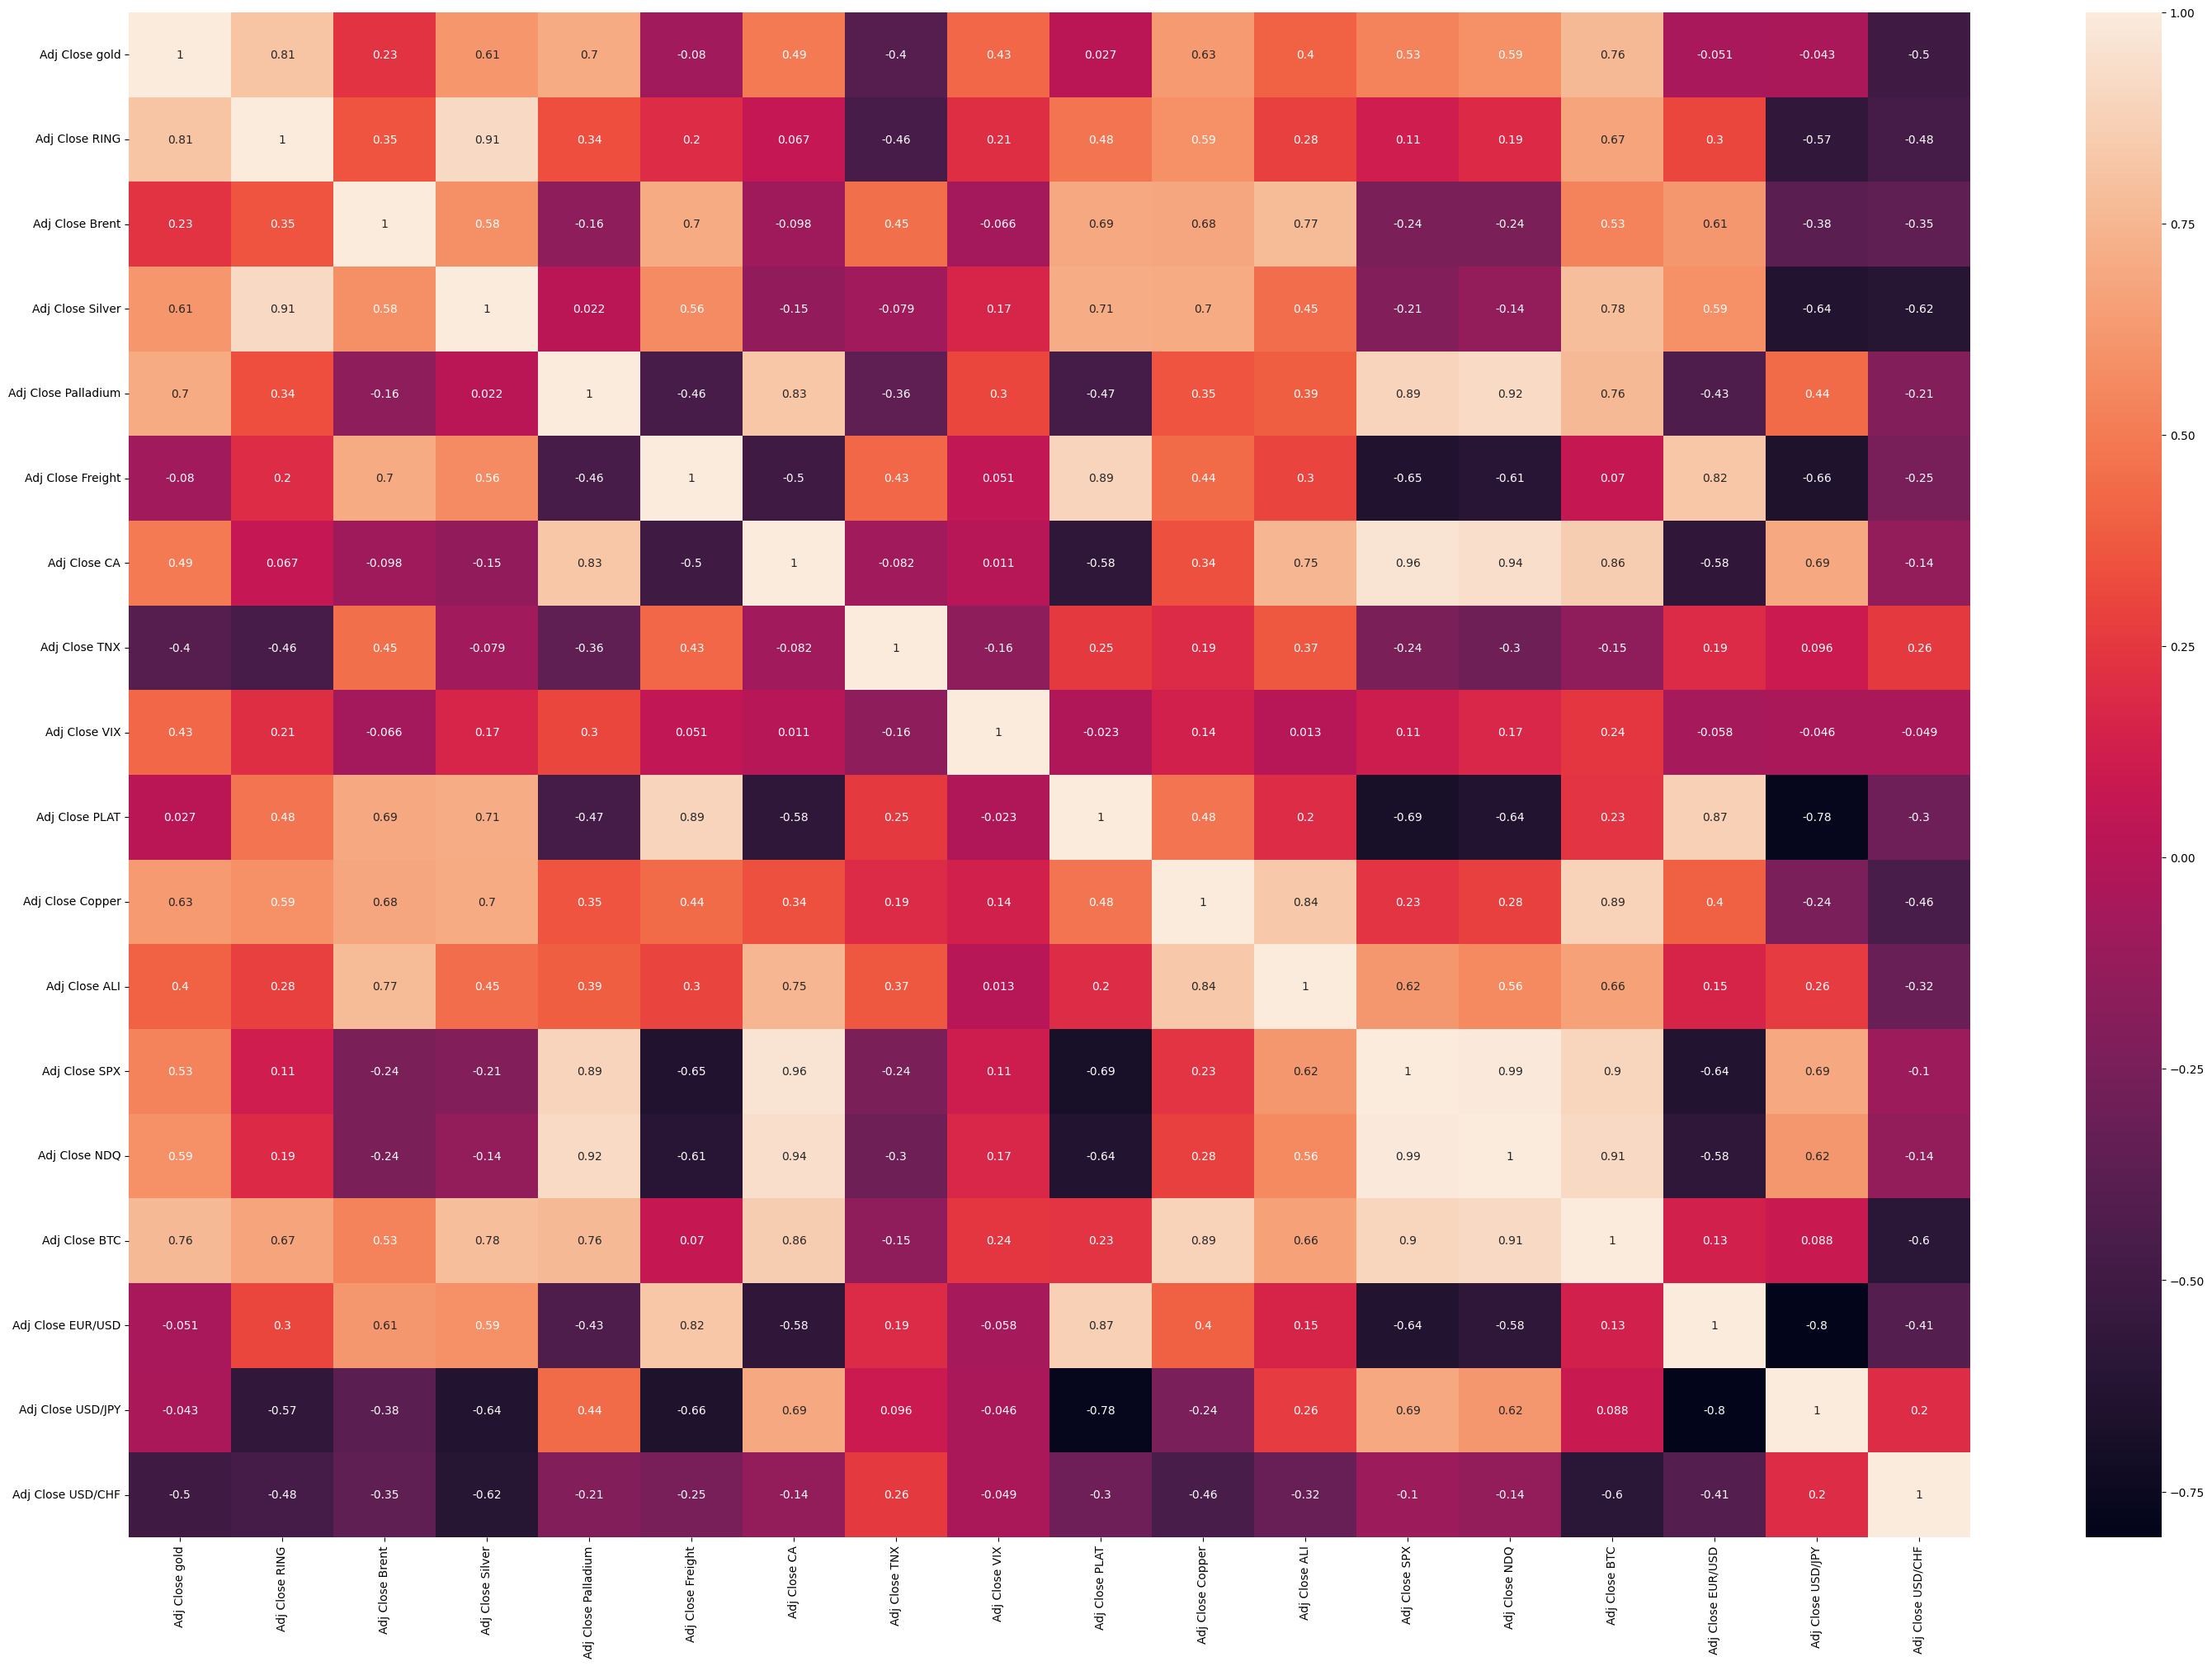

In [54]:
plt.figure(figsize=(36,24)) 
sns.heatmap(df.corr(), annot=True) 